In [9]:
# Dados do dataset

import pandas as pd

df = pd.read_csv("diabetes.csv")
#df_filtered = df[(df != 0).all(axis=1)]
df_filtered.head(10)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
14,5,166,72,19,175,25.8,0.587,51,1
19,1,115,70,30,96,34.6,0.529,32,1
24,11,143,94,33,146,36.6,0.254,51,1
25,10,125,70,26,115,31.1,0.205,41,1
31,3,158,76,36,245,31.6,0.851,28,1
39,4,111,72,47,207,37.1,1.390,56,1
43,9,171,110,24,240,45.4,0.721,54,1


In [ ]:
# Pre processamento

# Retirar nulos e zeros

# Clusterizar coisas
# normalizar
# Testar as variaveis que tenham melhor correlação

In [7]:
# Estatisticas
import pandas as pd
df = pd.read_csv("diabetes.csv")
#df = df[(df != 0).all(axis=1)]


print("Quantidade de NaN")
qnt_nan = df.isna().sum()
print(qnt_nan)


print("\n Quantidade de zeros")
qnt_zero = (df == 0).sum()
print(qnt_zero)

print("\n Quantidade de nulos")
qnt_null = df.isnull().sum()
print(qnt_null)


Quantidade de NaN
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

 Quantidade de zeros
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

 Quantidade de nulos
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


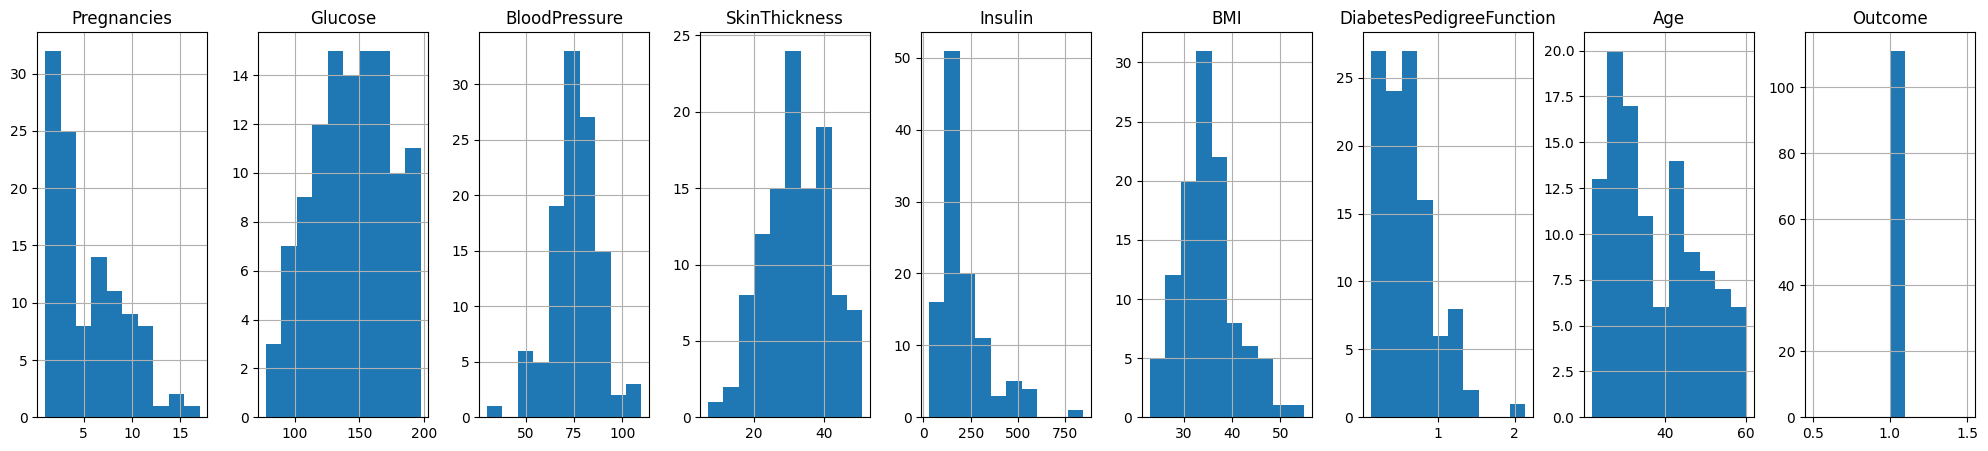

In [8]:
# Histogramas
import matplotlib.pyplot as plt#df_filtered
df = pd.read_csv("diabetes.csv")
df = df[(df != 0).all(axis=1)]

fig, axes = plt.subplots(1, len(df.columns), figsize=(25, 5))

for i, column in enumerate(df.columns):
    df.hist(column=[column], ax=axes[i])
    axes[i].set_title(column)


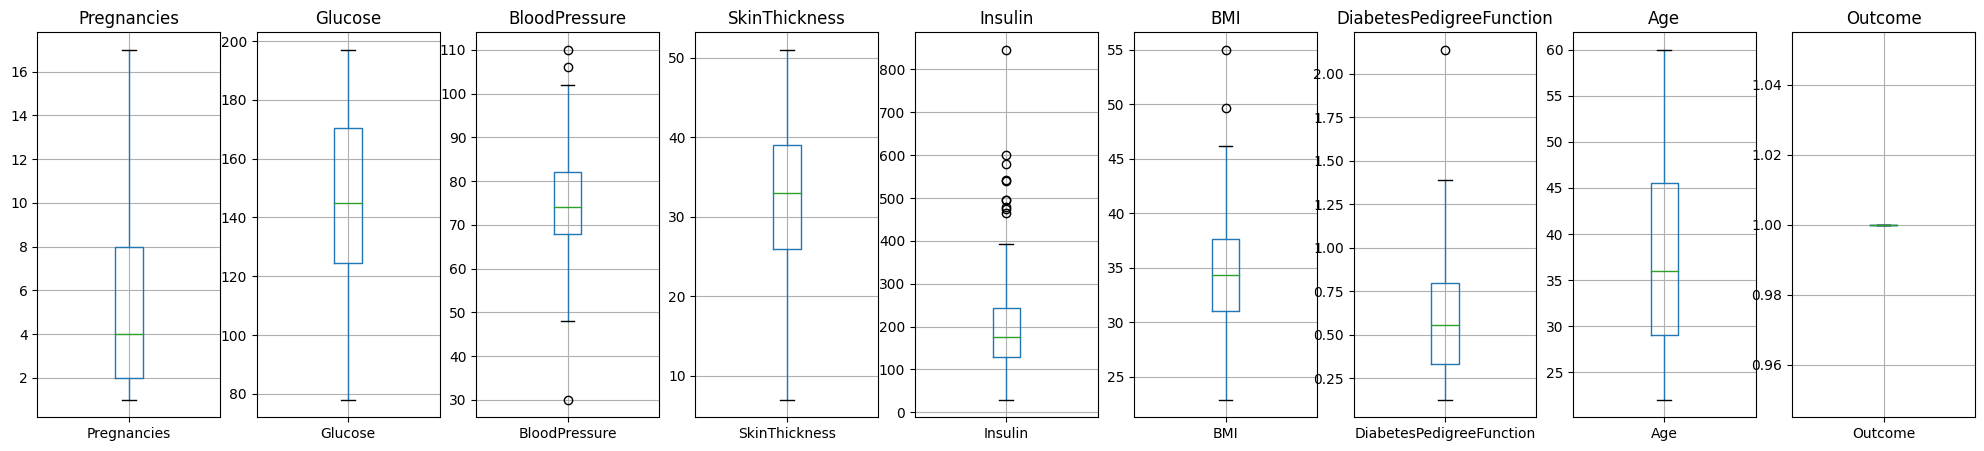

In [9]:
# Boxplots

import matplotlib.pyplot as plt
df = pd.read_csv("diabetes.csv")
df = df[(df != 0).all(axis=1)]

fig, axes = plt.subplots(1, len(df.columns), figsize=(25, 5)) 

for i, column in enumerate(df.columns):
    df.boxplot(column=[column], ax=axes[i])
    axes[i].set_title(column)

In [ ]:
# Pre processamento
def clusteringBloodPressure(x):
    if x < 60:
        return 0
    elif x < 70:
        return 1
    elif x < 90:
        return 2
    else:
        return 3
    
def clusteringAge(x):
    if x < 25:
        return 0
    elif x < 40:
        return 1 
    elif x < 55:
        return 2
    else:
        return 3
    
def clusteringGlucose(x):
    if x < 70:
        return 0
    elif x < 100:
        return 1 
    elif x < 126:
        return 2
    else:
        return 3
    
        
def clusteringBMI(x):
    if x < 19:
        return 0
    elif x < 25:
        return 1 
    elif x < 30:
        return 2
    else:
        return 3

    
def dropNullAndZero(df):
    df = df.dropna(axis=0)
    df = df[(df != 0).all(axis=1)]
    return df

# Completar com a media





In [44]:
# Sci-kitlearn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
import pandas as pd
from sklearn import preprocessing

data = pd.read_csv('diabetes.csv')

#feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
feature_cols = ['Pregnancies', 'Glucose',  'SkinThickness', 'BMI', 'DiabetesPedigreeFunction','Age']
f2 = ['Pregnancies', 'Glucose',  'SkinThickness', 'BMI', 'DiabetesPedigreeFunction','Age','Outcome']
X = data[f2]
X = X[(X[feature_cols] != 0).all(axis=1)]
y = X.Outcome
X = X.drop(columns=['Outcome'])

    
def clusteringAge(x):
    if x < 25:
        return 0
    elif x < 40:
        return 1
    elif x < 55:
        return 2
    else:
        return 3
    
def clusteringGlucose(x):
    if x < 70:
        return 0
    elif x < 100:
        return 1 
    elif x < 126:
        return 2
    else:
        return 3
    
        
def clusteringBMI(x):
    if x < 19:
        return 0
    elif x < 25:
        return 1 
    elif x < 30:
        return 2
    else:
        return 3



# # Discretizando valores
X['BMI'] = X['BMI'].apply(clusteringBMI)

X['Age'] = X['Age'].apply(clusteringAge)

# # normalizando

# scaler = preprocessing.MinMaxScaler()
# X[['Glucose','SkinThickness']] = scaler.fit_transform(X)
# print(X)

# Split de treino e de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

# Modelo de LR
logistic_model = LogisticRegression(random_state=42,max_iter=10000).fit(X_train, y_train)
pred = logistic_model.predict(X_test)

scr = logistic_model.score(X_test,y_test)

print(scr)

# Kfold com k=10
kf = KFold(n_splits=10, shuffle=True, random_state=0)
accuracy_scores = []

# Perform 10-fold cross-validation
for train_index, test_index in kf.split(X_test):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize and train a logistic regression model
    logistic_model = LogisticRegression(random_state=0, max_iter=10000)
    logistic_model.fit(X_train, y_train)
    
    # Calculate the accuracy score for this fold
    accuracy = logistic_model.score(X_test, y_test)
    
    # Append the accuracy score to the list
    accuracy_scores.append(accuracy)

# Calculate the mean accuracy across all folds
mean_accuracy = sum(accuracy_scores) / len(accuracy_scores)

print("Accuracy for each fold:", accuracy_scores)
print("Mean Accuracy across all folds:", mean_accuracy)

# TODO testar para overfitting

0.7841530054644809
Accuracy for each fold: [0.8648648648648649, 0.8378378378378378, 0.7837837837837838, 0.8378378378378378, 0.7837837837837838, 0.8378378378378378, 0.7777777777777778, 0.7777777777777778, 0.8888888888888888, 0.6388888888888888]
Mean Accuracy across all folds: 0.802927927927928


Epoch: 0, Training log loss: 0.757
Epoch: 20, Training log loss: 0.603
Epoch: 40, Training log loss: 0.454
Epoch: 60, Training log loss: 0.434
Epoch: 80, Training log loss: 0.421
Epoch: 100, Training log loss: 0.425
Epoch: 120, Training log loss: 0.400
Epoch: 140, Training log loss: 0.438
Epoch: 160, Training log loss: 0.474
Epoch: 180, Training log loss: 0.421
Epoch: 200, Training log loss: 0.410
Epoch: 220, Training log loss: 0.400
Epoch: 240, Training log loss: 0.422
Epoch: 260, Training log loss: 0.433
Epoch: 280, Training log loss: 0.416
Epoch: 300, Training log loss: 0.419
Epoch: 320, Training log loss: 0.449
Epoch: 340, Training log loss: 0.378
Epoch: 360, Training log loss: 0.460
Epoch: 380, Training log loss: 0.434
Epoch: 400, Training log loss: 0.434
Epoch: 420, Training log loss: 0.459
Epoch: 440, Training log loss: 0.425
Epoch: 460, Training log loss: 0.443
Epoch: 480, Training log loss: 0.447
Epoch: 500, Training log loss: 0.393
Epoch: 520, Training log loss: 0.426
Epoch: 

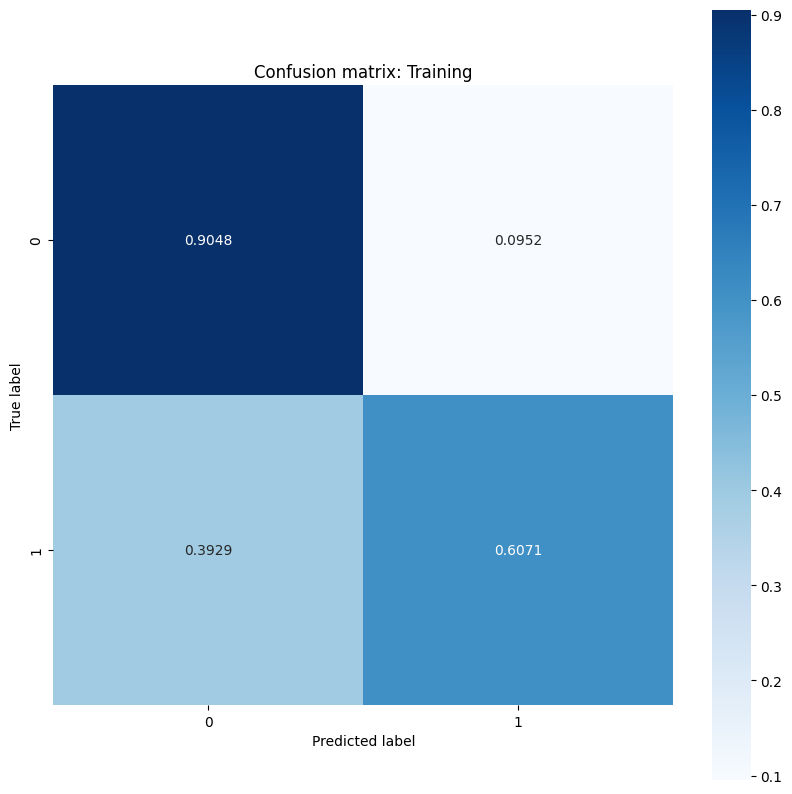

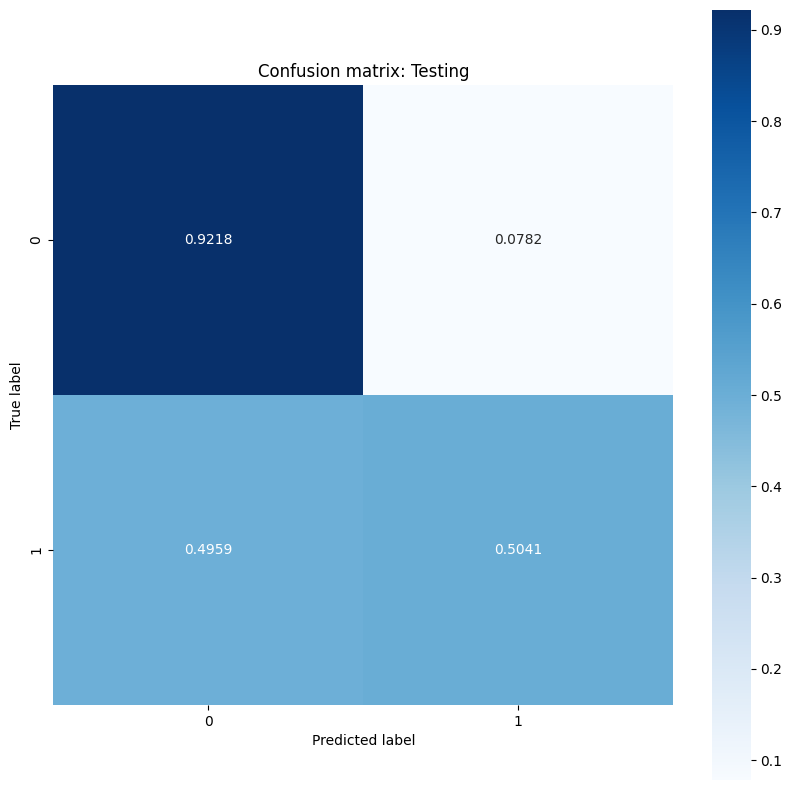

In [64]:
# Logistic Regression with Tensorflow

import tensorflow as tf
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn.metrics as sk_metrics


data = pd.read_csv('diabetes.csv')

feature_cols = ['Pregnancies', 'Glucose',  'SkinThickness', 'BMI', 'DiabetesPedigreeFunction','Age']
f2 = ['Pregnancies', 'Glucose',  'SkinThickness', 'BMI', 'DiabetesPedigreeFunction','Age','Outcome']
X = data[f2]
X = X[(X[feature_cols] != 0).all(axis=1)]
y = X.Outcome
X = X.drop(columns=['Outcome'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)


x_train, y_train = tf.convert_to_tensor(X_train, dtype=tf.float32), tf.convert_to_tensor(y_train, dtype=tf.float32)
x_test, y_test = tf.convert_to_tensor(X_test, dtype=tf.float32), tf.convert_to_tensor(y_test, dtype=tf.float32)

class Normalize(tf.Module):
  def __init__(self, x):
    # Initialize the mean and standard deviation for normalization
    self.mean = tf.Variable(tf.math.reduce_mean(x, axis=0))
    self.std = tf.Variable(tf.math.reduce_std(x, axis=0))

  def norm(self, x):
    # Normalize the input
    return (x - self.mean)/self.std

  def unnorm(self, x):
    # Unnormalize the input
    return (x * self.std) + self.mean

norm_x = Normalize(x_train)
x_train_norm, x_test_norm = norm_x.norm(x_train), norm_x.norm(x_test)


def log_loss(y_pred, y):
  # Compute the log loss function
  ce = tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=y_pred)
  return tf.reduce_mean(ce)

class LogisticRegression(tf.Module):

  def __init__(self):
    self.built = False

  def __call__(self, x, train=True):
    # Initialize the model parameters on the first call
    if not self.built:
      # Randomly generate the weights and the bias term
      rand_w = tf.random.uniform(shape=[x.shape[-1], 1], seed=22)
      rand_b = tf.random.uniform(shape=[], seed=22)
      self.w = tf.Variable(rand_w)
      self.b = tf.Variable(rand_b)
      self.built = True
    # Compute the model output
    z = tf.add(tf.matmul(x, self.w), self.b)
    z = tf.squeeze(z, axis=1)
    if train:
      return z
    return tf.sigmoid(z)
  

log_reg = LogisticRegression()

y_pred = log_reg(x_train_norm[:5], train=False)
y_pred.numpy()

def predict_class(y_pred, thresh=0.5):
  # Return a tensor with  `1` if `y_pred` > `0.5`, and `0` otherwise
  return tf.cast(y_pred > thresh, tf.float32)

def accuracy(y_pred, y):
  # Return the proportion of matches between `y_pred` and `y`
  y_pred = tf.math.sigmoid(y_pred)
  y_pred_class = predict_class(y_pred)
  check_equal = tf.cast(y_pred_class == y,tf.float32)
  acc_val = tf.reduce_mean(check_equal)
  return acc_val

batch_size = 64
train_dataset = tf.data.Dataset.from_tensor_slices((x_train_norm, y_train))
train_dataset = train_dataset.shuffle(buffer_size=x_train.shape[0]).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test_norm, y_test))
test_dataset = test_dataset.shuffle(buffer_size=x_test.shape[0]).batch(batch_size)
# Set training parameters
epochs = 2000
learning_rate = 0.01
train_losses, test_losses = [], []
train_accs, test_accs = [], []

optimizer = tf.keras.optimizers.Adam(learning_rate=0.011)

# Set up the training loop and begin training
for epoch in range(epochs):
    batch_losses_train, batch_accs_train = [], []
    batch_losses_test, batch_accs_test = [], []

    # Iterate over the training data
    for x_batch, y_batch in train_dataset:
        with tf.GradientTape() as tape:
            y_pred_batch = log_reg(x_batch)
            batch_loss = log_loss(y_pred_batch, y_batch)
        batch_acc = accuracy(y_pred_batch, y_batch)

        # Calculate gradients
        grads = tape.gradient(batch_loss, log_reg.trainable_variables)

        # Use the Adam optimizer to update model weights
        optimizer.apply_gradients(zip(grads, log_reg.trainable_variables))

        # Keep track of batch-level training performance
        batch_losses_train.append(batch_loss)
        batch_accs_train.append(batch_acc)

    # Iterate over the testing data
    for x_batch, y_batch in test_dataset:
        y_pred_batch = log_reg(x_batch)
        batch_loss = log_loss(y_pred_batch, y_batch)
        batch_acc = accuracy(y_pred_batch, y_batch)

        # Keep track of batch-level testing performance
        batch_losses_test.append(batch_loss)
        batch_accs_test.append(batch_acc)

    # Keep track of epoch-level model performance
    train_loss, train_acc = tf.reduce_mean(batch_losses_train), tf.reduce_mean(batch_accs_train)
    test_loss, test_acc = tf.reduce_mean(batch_losses_test), tf.reduce_mean(batch_accs_test)
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    test_losses.append(test_loss)
    test_accs.append(test_acc)

    if epoch % 20 == 0:
        print(f"Epoch: {epoch}, Training log loss: {train_loss:.3f}")


print(f"Final training accuracy: {train_accs[-1]:.3f}")
print(f"Final testing accuracy: {test_accs[-1]:.3f}")

def show_confusion_matrix(y, y_classes, typ):
  # Compute the confusion matrix and normalize it
  plt.figure(figsize=(10,10))
  confusion = sk_metrics.confusion_matrix(y.numpy(), y_classes.numpy())
  confusion_normalized = confusion / confusion.sum(axis=1, keepdims=True)
  axis_labels = range(2)
  ax = sns.heatmap(
      confusion_normalized, xticklabels=axis_labels, yticklabels=axis_labels,
      cmap='Blues', annot=True, fmt='.4f', square=True)
  plt.title(f"Confusion matrix: {typ}")
  plt.ylabel("True label")
  plt.xlabel("Predicted label")

y_pred_train, y_pred_test = log_reg(x_train_norm, train=False), log_reg(x_test_norm, train=False)
train_classes, test_classes = predict_class(y_pred_train), predict_class(y_pred_test)

show_confusion_matrix(y_train, train_classes, 'Training')
show_confusion_matrix(y_test, test_classes, 'Testing')


Epoch: 0, Training log loss: 0.610
Epoch: 20, Training log loss: 0.541
Epoch: 40, Training log loss: 0.499
Epoch: 60, Training log loss: 0.448
Epoch: 80, Training log loss: 0.444
Epoch: 100, Training log loss: 0.450
Epoch: 120, Training log loss: 0.422
Epoch: 140, Training log loss: 0.439
Epoch: 160, Training log loss: 0.439
Epoch: 180, Training log loss: 0.476
Epoch: 200, Training log loss: 0.431
Epoch: 220, Training log loss: 0.488
Epoch: 240, Training log loss: 0.435
Epoch: 260, Training log loss: 0.423
Epoch: 280, Training log loss: 0.430
Epoch: 300, Training log loss: 0.449
Epoch: 320, Training log loss: 0.434
Epoch: 340, Training log loss: 0.395
Epoch: 360, Training log loss: 0.453
Epoch: 380, Training log loss: 0.451
Epoch: 400, Training log loss: 0.417
Epoch: 420, Training log loss: 0.501
Epoch: 440, Training log loss: 0.497
Epoch: 460, Training log loss: 0.426
Epoch: 480, Training log loss: 0.457
Epoch: 500, Training log loss: 0.404
Epoch: 520, Training log loss: 0.433
Epoch: 

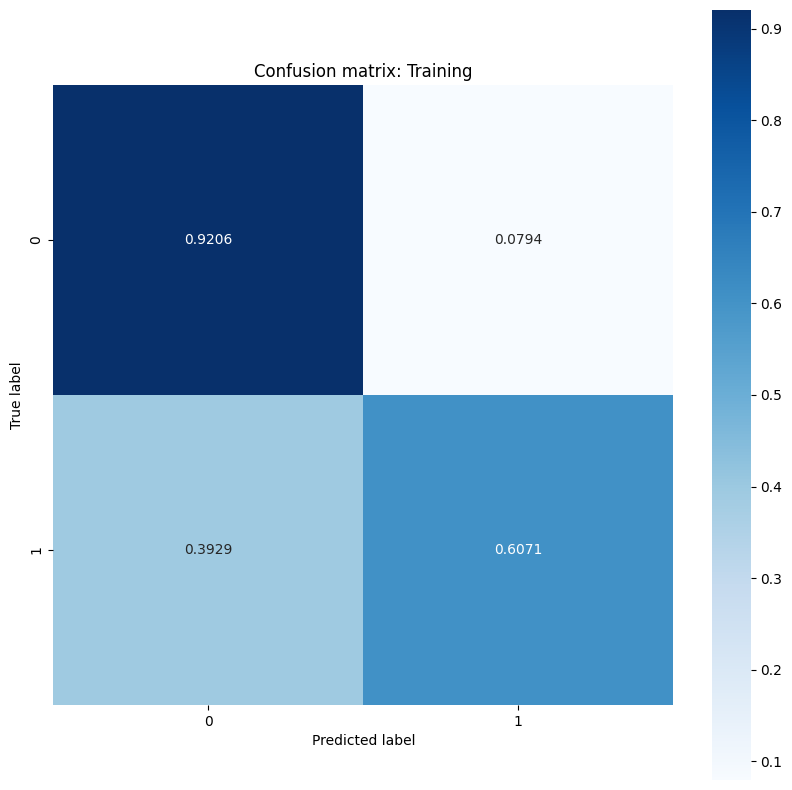

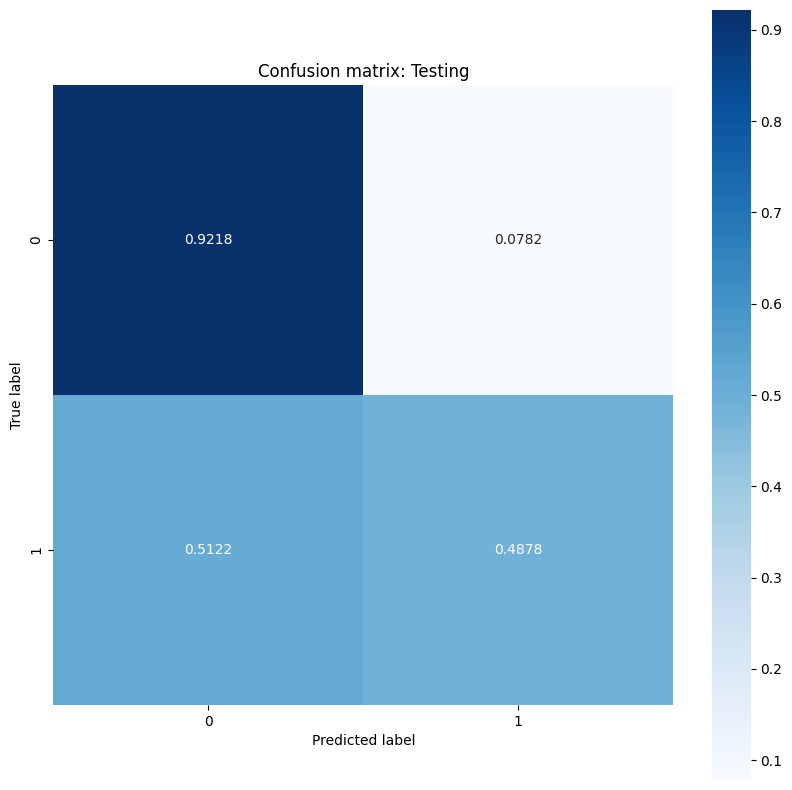

In [66]:
# Logistic Regression with Tensorflow

import tensorflow as tf
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn.metrics as sk_metrics


data = pd.read_csv('diabetes.csv')

feature_cols = ['Pregnancies', 'Glucose',  'SkinThickness', 'BMI', 'DiabetesPedigreeFunction','Age']
f2 = ['Pregnancies', 'Glucose',  'SkinThickness', 'BMI', 'DiabetesPedigreeFunction','Age','Outcome']
X = data[f2]
X = X[(X[feature_cols] != 0).all(axis=1)]
y = X.Outcome
X = X.drop(columns=['Outcome'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)


x_train, y_train = tf.convert_to_tensor(X_train, dtype=tf.float32), tf.convert_to_tensor(y_train, dtype=tf.float32)
x_test, y_test = tf.convert_to_tensor(X_test, dtype=tf.float32), tf.convert_to_tensor(y_test, dtype=tf.float32)

class Normalize(tf.Module):
  def __init__(self, x):
    # Initialize the mean and standard deviation for normalization
    self.mean = tf.Variable(tf.math.reduce_mean(x, axis=0))
    self.std = tf.Variable(tf.math.reduce_std(x, axis=0))

  def norm(self, x):
    # Normalize the input
    return (x - self.mean)/self.std

  def unnorm(self, x):
    # Unnormalize the input
    return (x * self.std) + self.mean

norm_x = Normalize(x_train)
x_train_norm, x_test_norm = norm_x.norm(x_train), norm_x.norm(x_test)

l2_lambda = 0.01  # Adjust the value as needed

# Modify the loss function to include L2 regularization
def log_loss_with_l2(y_pred, y):
    # Compute the log loss function with L2 regularization
    ce = tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=y_pred)
    l2_loss = l2_lambda * tf.reduce_sum([tf.nn.l2_loss(w) for w in log_reg.trainable_variables])
    return tf.reduce_mean(ce) + l2_loss  # Add L2 regularization term

class LogisticRegression(tf.Module):

  def __init__(self):
    self.built = False

  def __call__(self, x, train=True):
    # Initialize the model parameters on the first call
    if not self.built:
      # Randomly generate the weights and the bias term
      rand_w = tf.random.uniform(shape=[x.shape[-1], 1], seed=22)
      rand_b = tf.random.uniform(shape=[], seed=22)
      self.w = tf.Variable(rand_w)
      self.b = tf.Variable(rand_b)
      self.built = True
    # Compute the model output
    z = tf.add(tf.matmul(x, self.w), self.b)
    z = tf.squeeze(z, axis=1)
    if train:
      return z
    return tf.sigmoid(z)
  

log_reg = LogisticRegression()

y_pred = log_reg(x_train_norm[:5], train=False)
y_pred.numpy()

def predict_class(y_pred, thresh=0.5):
  # Return a tensor with  `1` if `y_pred` > `0.5`, and `0` otherwise
  return tf.cast(y_pred > thresh, tf.float32)

def accuracy(y_pred, y):
  # Return the proportion of matches between `y_pred` and `y`
  y_pred = tf.math.sigmoid(y_pred)
  y_pred_class = predict_class(y_pred)
  check_equal = tf.cast(y_pred_class == y,tf.float32)
  acc_val = tf.reduce_mean(check_equal)
  return acc_val

batch_size = 64
train_dataset = tf.data.Dataset.from_tensor_slices((x_train_norm, y_train))
train_dataset = train_dataset.shuffle(buffer_size=x_train.shape[0]).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test_norm, y_test))
test_dataset = test_dataset.shuffle(buffer_size=x_test.shape[0]).batch(batch_size)
# Set training parameters
epochs = 2000
learning_rate = 0.01
train_losses, test_losses = [], []
train_accs, test_accs = [], []

optimizer = tf.keras.optimizers.Adam(learning_rate=0.011)

# Set up the training loop and begin training
for epoch in range(epochs):
    batch_losses_train, batch_accs_train = [], []
    batch_losses_test, batch_accs_test = [], []

    # Iterate over the training data
    for x_batch, y_batch in train_dataset:
        with tf.GradientTape() as tape:
            y_pred_batch = log_reg(x_batch)
            batch_loss = log_loss_with_l2(y_pred_batch, y_batch)  # Use the updated loss function
        batch_acc = accuracy(y_pred_batch, y_batch)

        # Calculate gradients
        grads = tape.gradient(batch_loss, log_reg.trainable_variables)

        # Use the Adam optimizer to update model weights
        optimizer.apply_gradients(zip(grads, log_reg.trainable_variables))

        # Keep track of batch-level training performance
        batch_losses_train.append(batch_loss)
        batch_accs_train.append(batch_acc)

    # Iterate over the testing data
    for x_batch, y_batch in test_dataset:
        y_pred_batch = log_reg(x_batch)
        batch_loss = log_loss(y_pred_batch, y_batch)
        batch_acc = accuracy(y_pred_batch, y_batch)

        # Keep track of batch-level testing performance
        batch_losses_test.append(batch_loss)
        batch_accs_test.append(batch_acc)

    # Keep track of epoch-level model performance
    train_loss, train_acc = tf.reduce_mean(batch_losses_train), tf.reduce_mean(batch_accs_train)
    test_loss, test_acc = tf.reduce_mean(batch_losses_test), tf.reduce_mean(batch_accs_test)
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    test_losses.append(test_loss)
    test_accs.append(test_acc)

    if epoch % 20 == 0:
        print(f"Epoch: {epoch}, Training log loss: {train_loss:.3f}")


print(f"Final training accuracy: {train_accs[-1]:.3f}")
print(f"Final testing accuracy: {test_accs[-1]:.3f}")

def show_confusion_matrix(y, y_classes, typ):
  # Compute the confusion matrix and normalize it
  plt.figure(figsize=(10,10))
  confusion = sk_metrics.confusion_matrix(y.numpy(), y_classes.numpy())
  confusion_normalized = confusion / confusion.sum(axis=1, keepdims=True)
  axis_labels = range(2)
  ax = sns.heatmap(
      confusion_normalized, xticklabels=axis_labels, yticklabels=axis_labels,
      cmap='Blues', annot=True, fmt='.4f', square=True)
  plt.title(f"Confusion matrix: {typ}")
  plt.ylabel("True label")
  plt.xlabel("Predicted label")

y_pred_train, y_pred_test = log_reg(x_train_norm, train=False), log_reg(x_test_norm, train=False)
train_classes, test_classes = predict_class(y_pred_train), predict_class(y_pred_test)

show_confusion_matrix(y_train, train_classes, 'Training')
show_confusion_matrix(y_test, test_classes, 'Testing')


In [68]:
# Logistic Regression with Tensorflow

import tensorflow as tf
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn.metrics as sk_metrics


data = pd.read_csv('diabetes.csv')

feature_cols = ['Pregnancies', 'Glucose',  'SkinThickness', 'BMI', 'DiabetesPedigreeFunction','Age']
f2 = ['Pregnancies', 'Glucose',  'SkinThickness', 'BMI', 'DiabetesPedigreeFunction','Age','Outcome']
X = data[f2]
X = X[(X[feature_cols] != 0).all(axis=1)]
y = X.Outcome
X = X.drop(columns=['Outcome'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)


x_train, y_train = tf.convert_to_tensor(X_train, dtype=tf.float32), tf.convert_to_tensor(y_train, dtype=tf.float32)
x_test, y_test = tf.convert_to_tensor(X_test, dtype=tf.float32), tf.convert_to_tensor(y_test, dtype=tf.float32)

class MinMaxNormalize(tf.Module):
  def __init__(self, x):
    # Initialize the minimum and maximum values for normalization
    self.min_val = tf.Variable(tf.math.reduce_min(x, axis=0))
    self.max_val = tf.Variable(tf.math.reduce_max(x, axis=0))

  def norm(self, x):
    # Min-max normalize the input
    return (x - self.min_val) / (self.max_val - self.min_val)

  def unnorm(self, x):
    # Unnormalize the input
    return x * (self.max_val - self.min_val) + self.min_val

norm_x = MinMaxNormalize(x_train)
x_train_norm, x_test_norm = norm_x.norm(x_train), norm_x.norm(x_test)



def log_loss(y_pred, y):
  # Compute the log loss function
  ce = tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=y_pred)
  return tf.reduce_mean(ce)

class LogisticRegression(tf.Module):

  def __init__(self):
    self.built = False

  def __call__(self, x, train=True):
    # Initialize the model parameters on the first call
    if not self.built:
      # Randomly generate the weights and the bias term
      rand_w = tf.random.uniform(shape=[x.shape[-1], 1], seed=22)
      rand_b = tf.random.uniform(shape=[], seed=22)
      self.w = tf.Variable(rand_w)
      self.b = tf.Variable(rand_b)
      self.built = True
    # Compute the model output
    z = tf.add(tf.matmul(x, self.w), self.b)
    z = tf.squeeze(z, axis=1)
    if train:
      return z
    return tf.sigmoid(z)
  

log_reg = LogisticRegression()

y_pred = log_reg(x_train_norm[:5], train=False)
y_pred.numpy()

def predict_class(y_pred, thresh=0.5):
  # Return a tensor with  `1` if `y_pred` > `0.5`, and `0` otherwise
  return tf.cast(y_pred > thresh, tf.float32)

def accuracy(y_pred, y):
  # Return the proportion of matches between `y_pred` and `y`
  y_pred = tf.math.sigmoid(y_pred)
  y_pred_class = predict_class(y_pred)
  check_equal = tf.cast(y_pred_class == y,tf.float32)
  acc_val = tf.reduce_mean(check_equal)
  return acc_val

batch_size = 64
train_dataset = tf.data.Dataset.from_tensor_slices((x_train_norm, y_train))
train_dataset = train_dataset.shuffle(buffer_size=x_train.shape[0]).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test_norm, y_test))
test_dataset = test_dataset.shuffle(buffer_size=x_test.shape[0]).batch(batch_size)
# Set training parameters
epochs = 20000
learning_rate = 0.01
train_losses, test_losses = [], []
train_accs, test_accs = [], []

optimizer = tf.keras.optimizers.Adam(learning_rate=0.011)

# Set up the training loop and begin training
for epoch in range(epochs):
    batch_losses_train, batch_accs_train = [], []
    batch_losses_test, batch_accs_test = [], []

    # Iterate over the training data
    for x_batch, y_batch in train_dataset:
        with tf.GradientTape() as tape:
            y_pred_batch = log_reg(x_batch)
            batch_loss = log_loss(y_pred_batch, y_batch)
        batch_acc = accuracy(y_pred_batch, y_batch)

        # Calculate gradients
        grads = tape.gradient(batch_loss, log_reg.trainable_variables)

        # Use the Adam optimizer to update model weights
        optimizer.apply_gradients(zip(grads, log_reg.trainable_variables))

        # Keep track of batch-level training performance
        batch_losses_train.append(batch_loss)
        batch_accs_train.append(batch_acc)

    # Iterate over the testing data
    for x_batch, y_batch in test_dataset:
        y_pred_batch = log_reg(x_batch)
        batch_loss = log_loss(y_pred_batch, y_batch)
        batch_acc = accuracy(y_pred_batch, y_batch)

        # Keep track of batch-level testing performance
        batch_losses_test.append(batch_loss)
        batch_accs_test.append(batch_acc)

    # Keep track of epoch-level model performance
    train_loss, train_acc = tf.reduce_mean(batch_losses_train), tf.reduce_mean(batch_accs_train)
    test_loss, test_acc = tf.reduce_mean(batch_losses_test), tf.reduce_mean(batch_accs_test)
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    test_losses.append(test_loss)
    test_accs.append(test_acc)

    if epoch % 20 == 0:
        print(f"Epoch: {epoch}, Training log loss: {train_loss:.3f}")


print(f"Final training accuracy: {train_accs[-1]:.3f}")
print(f"Final testing accuracy: {test_accs[-1]:.3f}")

def show_confusion_matrix(y, y_classes, typ):
  # Compute the confusion matrix and normalize it
  plt.figure(figsize=(10,10))
  confusion = sk_metrics.confusion_matrix(y.numpy(), y_classes.numpy())
  confusion_normalized = confusion / confusion.sum(axis=1, keepdims=True)
  axis_labels = range(2)
  ax = sns.heatmap(
      confusion_normalized, xticklabels=axis_labels, yticklabels=axis_labels,
      cmap='Blues', annot=True, fmt='.4f', square=True)
  plt.title(f"Confusion matrix: {typ}")
  plt.ylabel("True label")
  plt.xlabel("Predicted label")

y_pred_train, y_pred_test = log_reg(x_train_norm, train=False), log_reg(x_test_norm, train=False)
train_classes, test_classes = predict_class(y_pred_train), predict_class(y_pred_test)

show_confusion_matrix(y_train, train_classes, 'Training')
show_confusion_matrix(y_test, test_classes, 'Testing')


Epoch: 0, Training log loss: 1.183
Epoch: 20, Training log loss: 0.781
Epoch: 40, Training log loss: 0.685
